<a href="https://colab.research.google.com/github/poverty149/Fashion-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST

In [ ]:
import matplotlib.pylab as plt 
from matplotlib import pyplot
import numpy as np 
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

##Load Dataset

In [ ]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
assert x_train.shape==(60000,28,28)
assert x_test.shape==(10000,28,28)
assert y_train.shape==(60000,)
assert y_test.shape==(10000,)

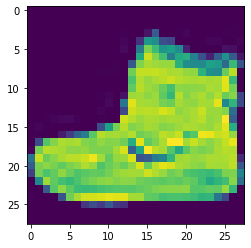

In [ ]:
#plot the first image in the dataset
plt.imshow(x_train[0])

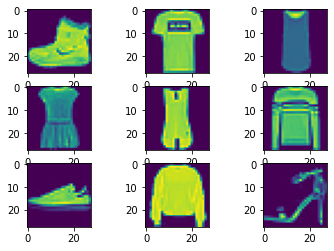

In [ ]:
for i in range(9):
	pyplot.subplot(330+1+ i)
	pyplot.imshow(x_train[i])
pyplot.show()

##Preprocessing

In [ ]:
# reshape the training data into a form which can be easily identified by the cnn model as corresponding to greyscale images.
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# reshape the y training and test data and use one hot encoding 
y_train=y_train.reshape(60000,1)
y_test=y_test.reshape(10000,1)
print(y_train.shape)
print(y_test.shape)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(60000, 1)
(10000, 1)


##Model

In [ ]:
model=Sequential()

## add the different layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1),name='conv_1'))
model.add(MaxPooling2D(pool_size=(2,2),name='max_pool_1'))
model.add(Conv2D(32,kernel_size=3,activation='relu',name='conv_2'))
model.add(MaxPooling2D(pool_size=(2,2),name='max_pool_2'))
model.add(Flatten(name='flatten'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 13, 13, 64)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pool_2 (MaxPooling2D)    (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
____________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [ ]:
# BATCH_SIZE=128
# EPOCH_SIZE=25

In [ ]:

# history=model.fit(gen.flow(x_train, y_train, BATCH_SIZE), 
                  # steps_per_epoch = y_train.shape[0] // BATCH_SIZE, 
                  # epochs = EPOCH_SIZE, 
                  # validation_data = gen.flow(x_test, y_test, BATCH_SIZE),
                  # validation_steps = y_test.shape[0] // BATCH_SIZE
                  
                    # )

In [ ]:

#gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)

In [ ]:
#train the model
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 70s 38ms/step - loss: 0.2906 - accuracy: 0.8999 - val_loss: 0.4277 - val_accuracy: 0.8773
Epoch 2/3
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2445 - accuracy: 0.9119 - val_loss: 0.4164 - val_accuracy: 0.8808
Epoch 3/3
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2363 - accuracy: 0.9151 - val_loss: 0.4201 - val_accuracy: 0.8766


In [ ]:
#Train the model
history=model.fit(x_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=25, #number of iterations over the entire dataset to train on
          batch_size=128)#number of samples per gradient update for training

Epoch 1/25
469/469 [==============================] - 61s 130ms/step - loss: 0.1648 - accuracy: 0.9389
Epoch 2/25
469/469 [==============================] - 61s 129ms/step - loss: 0.1398 - accuracy: 0.9488
Epoch 3/25
469/469 [==============================] - 60s 129ms/step - loss: 0.1324 - accuracy: 0.9511
Epoch 4/25
469/469 [==============================] - 61s 130ms/step - loss: 0.1329 - accuracy: 0.9504
Epoch 5/25
469/469 [==============================] - 60s 128ms/step - loss: 0.1347 - accuracy: 0.9502
Epoch 6/25
469/469 [==============================] - 60s 128ms/step - loss: 0.1390 - accuracy: 0.9476
Epoch 7/25
469/469 [==============================] - 61s 129ms/step - loss: 0.1390 - accuracy: 0.9486
Epoch 8/25
469/469 [==============================] - 61s 129ms/step - loss: 0.1379 - accuracy: 0.9482
Epoch 9/25
469/469 [==============================] - 60s 129ms/step - loss: 0.1351 - accuracy: 0.9506
Epoch 10/25
469/469 [==============================] - 60s 128ms/step - l

##Further graphs and analysis

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


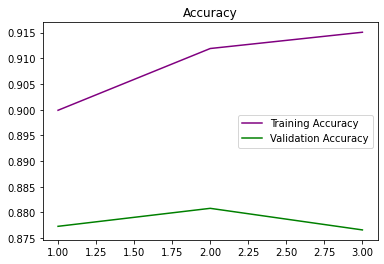

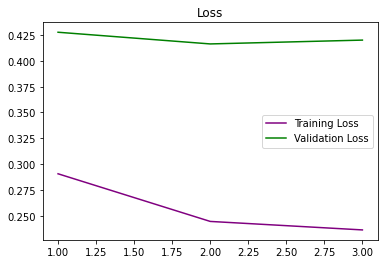

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Accuracy')
plt.plot(epochs, acc, 'purple', label='Training Accuracy')
plt.plot(epochs, val_acc, 'green', label = 'Validation Accuracy')
plt.legend()

plt.figure()
plt.title('Loss')
plt.plot(epochs, loss, 'purple', label = 'Training Loss')
plt.plot(epochs, val_loss, 'green', label = 'Validation Loss')

plt.legend()

plt.show()

In [ ]:
score=model.evaluate(x_test, y_test, verbose = 0)
print('Loss on running test : ', score[0])
print('Accuracy on running test : ', score[1])

Loss on running test :  0.4201034605503082
Accuracy on running test :  0.8766000270843506
